In [2]:
pl = pd.read_csv('GMagAO-X-target-list.csv')
spt = pl['SpT Number'].copy()
spt.loc[np.where(np.isnan(spt))[0]] = pl['Mam Inferred SpT from Teff'][np.where(np.isnan(spt))[0]]
#[c for c in pl.columns]

In [3]:
[c for c in pl.columns]

['loc_rowid',
 'pl_name',
 'hostname',
 'hd_name',
 'hip_name',
 'gaia_id',
 'default_flag',
 'sy_snum',
 'sy_pnum',
 'discoverymethod',
 'disc_year',
 'soltype',
 'pl_controv_flag',
 'pl_refname',
 'pl_orbper',
 'pl_orbpererr1',
 'pl_orbpererr2',
 'pl_orbperlim',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_orbsmaxlim',
 'pl_rade',
 'pl_radeerr1',
 'pl_radeerr2',
 'pl_radelim',
 'pl_radj',
 'pl_radjerr1',
 'pl_radjerr2',
 'pl_radjlim',
 'pl_masse',
 'pl_masseerr1',
 'pl_masseerr2',
 'pl_masselim',
 'pl_massj',
 'pl_massjerr1',
 'pl_massjerr2',
 'pl_massjlim',
 'pl_msinie',
 'pl_msinieerr1',
 'pl_msinieerr2',
 'pl_msinielim',
 'pl_msinij',
 'pl_msinijerr1',
 'pl_msinijerr2',
 'pl_msinijlim',
 'pl_bmasse',
 'pl_bmasseerr1',
 'pl_bmasseerr2',
 'pl_bmasselim',
 'pl_bmassj',
 'pl_bmassjerr1',
 'pl_bmassjerr2',
 'pl_bmassjlim',
 'pl_bmassprov',
 'pl_orbeccen',
 'pl_orbeccenerr1',
 'pl_orbeccenerr2',
 'pl_orbeccenlim',
 'pl_insol',
 'pl_insolerr1',
 'pl_insolerr2',
 'pl_insollim

In [4]:
orbits = pl[['pl_orbsmax','pl_orbper','pl_orbincl','pl_orbeccen','pl_masse','pl_msinie','st_mass', 
             'sy_dist','Re', 'pl_orblper','pl_name']]
orbits['SpT Number'] = spt
orbits = orbits.drop(np.where(np.isnan(orbits['pl_orbsmax']))[0])
orbits = orbits.reset_index(drop=True)
orbits = orbits.drop(np.where(np.isnan(orbits['st_mass']))[0])
orbits = orbits.reset_index(drop=True)
orbits = orbits.drop(np.where(np.isnan(orbits['pl_orbper']))[0])
orbits = orbits.reset_index(drop=True)
orbits = orbits.drop(np.where(np.isnan(orbits['pl_orbeccen']))[0])
orbits = orbits.reset_index(drop=True)


orbits['pl_mass_or_msini_e'] = orbits['pl_masse']
for i in range(len(orbits)):
    if np.isnan(orbits['pl_masse'][i]):
        orbits['pl_mass_or_msini_e'][i] = orbits['pl_msinie'][i]
        
orbits

/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_48847/388503433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orbits['SpT Number'] = spt
/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_48847/388503433.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orbits['pl_mass_or_msini_e'][i] = orbits['pl_msinie'][i]


,pl_orbsmax,pl_orbper,pl_orbincl,pl_orbeccen,pl_masse,pl_msinie,st_mass,sy_dist,Re,pl_orblper,pl_name,SpT Number,pl_mass_or_msini_e
0,2.8000,1796.4000,NaN,0.338,NaN,1506.45000,0.90,17.9323,11.981839,22.580,14 Her b,4.722567,1506.45000
1,1.6600,798.5000,NaN,0.680,NaN,565.73740,1.08,21.1397,11.686000,NaN,16 Cyg B b,4.387715,565.73740
2,0.9950,335.1000,NaN,0.289,NaN,3140.03000,1.16,44.6570,11.663215,307.000,30 Ari B b,3.600000,3140.03000
3,2.1000,1076.6000,NaN,0.012,NaN,778.68350,1.06,13.7967,11.843042,147.000,47 UMa b,4.000000,778.68350
4,3.6000,2391.0000,NaN,0.098,NaN,171.62100,1.06,13.7967,10.502257,295.000,47 UMa c,4.307809,171.62100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0.2300,39.6450,NaN,0.028,NaN,349.61300,1.00,17.4671,11.337947,30.000,rho CrB b,4.369942,349.61300
406,0.4157,102.5570,NaN,0.044,NaN,28.12781,0.91,17.4671,5.924378,16.000,rho CrB c,4.374341,28.12781
407,0.8290,240.9402,NaN,0.245,4443.24113,622.94368,1.31,13.4054,11.739158,247.659,ups And c,3.800000,4443.24113
408,2.5170,1282.4100,NaN,0.294,NaN,1303.09647,1.29,13.4054,11.976042,73.800,ups And d,4.125273,1303.09647


In [3]:
len(np.where(np.isnan(orbits['pl_orblper']))[0])


From Cahoy 2010 Eqn 1:

$$ C(\alpha) = \frac{2}{3} A_g(\lambda) \left(\frac{R_p}{\rho}\right)^2 \left[\frac{\sin\alpha + (\pi - \alpha)\cos\alpha}{\pi} \right]$$
where<br>
$C(\alpha)$ is planet-star contrast<br>
$ A_g(\lambda)$ is geometric albedo<br>
$R_p$ is planet radius<br>
$\rho$ is planet-star separation<br>

And phase as a function of orbital elements is given by:<br>

$$\alpha = \cos^{-1} \left(\sin(i) \;\times\; \sin(\theta + \omega_p)\right)$$
where<br>
$\omega_p$ is argument of periastron<br>
$i$ is inclination, with i=90 being edge on and i = 0,180 being face on<br>
$\theta$ is the true anomaly with
$$\theta = 2 \tan^{-1} \left(\sqrt{\frac{1+e}{1-e}} \tan(E/2) \right)$$
where<br>
$e$ is the eccentricity<br>
$E$ is the eccentricity anomaly<br>
with
$$M = E - e \sin E$$
$$M = 2\pi \frac{\Delta t}{P}$$
where<br>
$M$ is the mean anomaly<br>
$\Delta t$ is the time since periastron passage<br>
$P$ is the orbital period

In [5]:
n = 100
i = np.where(~np.isnan(orbits['pl_orbincl']))[0][1]
meananom = np.linspace(0,2*np.pi,n)
inc = orbits.loc[i]['pl_orbincl'] # deg, keplerian_to_cartesian takes angles in degrees
ecc = orbits.loc[i]['pl_orbeccen']
sma = orbits.loc[i]['pl_orbsmax']*u.au
argp = orbits.loc[i]['pl_orblper'] # deg
lon = 0
star_mass = orbits.loc[i]['st_mass']
pl_mass = orbits.loc[i]['pl_mass_or_msini_e']
distance = orbits.loc[i]['sy_dist']
print(orbits.loc[i]['pl_name'])

from myastrotools.reflectx_supplemental import (keplerian_to_cartesian, keplersconstant, danby_solve, 
                                                eccentricity_anomaly, GetPhaseAngle, ComputeFluxRatio,
                                               Get_LOD)

kep = keplersconstant(star_mass*u.Msun,pl_mass*u.Mearth)

seps = []
conts = []
alphas = []
for j in range(len(meananom)):
    if np.isnan(argp):
        seps2 = []
        for w in np.linspace(0,2*np.pi, 50):
            pos, vel, acc = keplerian_to_cartesian(sma,ecc,inc,w,lon,meananom[j],kep)
            sep = np.sqrt(pos[0]**2+pos[1]**2)
            seps2.append(sep.value)
        sep = np.mean(seps2)*u.au
    else:
        pos, vel, acc = keplerian_to_cartesian(sma,ecc,inc,
                                               argp,lon,meananom[j],kep)
        sep = np.sqrt(pos[0]**2+pos[1]**2)


    alpha = GetPhaseAngle(meananom[j], ecc, inc, argp)

    Rp = orbits.loc[i]['Re'] * u.Rearth
    cont = ComputeFluxRatio(Rp, sep, alpha, Ag = 0.5)
    
    seps.append(sep.value)
    conts.append(cont.value)
    alphas.append(alpha)
    
seps = np.array(seps)
conts = np.array(conts)
alphas = np.array(alphas)


BD+45 564 b


In [6]:
# Now what parts of the orbit will be inside the IWA?
seps_mas = (seps/distance)*u.arcsec.to(u.mas)

# What lod?
sloan_JH_filters = {'g': {'central wavelength':4782.325,'wavelength_unit':u.AA},
                    'r': {'central wavelength':6260.406,'wavelength_unit':u.AA},
                    'i': {'central wavelength':7732.03,'wavelength_unit':u.AA},
                    'z': {'central wavelength':966.592,'wavelength_unit':u.nm},
                    'J': {'central wavelength':1.246,'wavelength_unit':u.um},
                    'H': {'central wavelength':1.621,'wavelength_unit':u.um}}

from myastrotools.reflectx_supplemental import (SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, 
                                                NIRC2HFilter, NIRC2JFilter)

filters = [SloangFilter(),SloanrFilter(),SloaniFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]

f = filters[2]
lod = Get_LOD(f.central_wavelength*f.wavelength_unit, 6.5*u.m)

seps_lod_magaox = seps_mas/lod

lod = Get_LOD(f.central_wavelength*f.wavelength_unit, 25.4*u.m)

seps_lod_gmagaox = seps_mas/lod
seps_lod_gmagaox

array([2.17020431, 2.17087121, 2.17309495, 2.17685916, 2.18213483,
       2.1888809 , 2.19704499, 2.2065644 , 2.21736724, 2.22937368,
       2.24249725, 2.25664617, 2.27172468, 2.28763433, 2.30427512,
       2.32154662, 2.33934896, 2.35758367, 2.37615367, 2.394966  ,
       2.41393048, 2.43296036, 2.45197274, 2.47088879, 2.48963389,
       2.50813763, 2.52633385, 2.54416057, 2.56155993, 2.57847788,
       2.59486399, 2.61067259, 2.62586102, 2.64038999, 2.6542235 ,
       2.66732858, 2.67967523, 2.6912362 , 2.70198689, 2.7119052 ,
       2.72097137, 2.72916793, 2.73647954, 2.74289293, 2.74839676,
       2.75298162, 2.75663989, 2.75936574, 2.76115507, 2.76200543,
       2.76191618, 2.7608884 , 2.75892464, 2.75602911, 2.7522077 ,
       2.74746796, 2.74181916, 2.73527232, 2.72784029, 2.71953776,
       2.71038139, 2.70038986, 2.68958397, 2.67798673, 2.66562347,
       2.65252175, 2.63871145, 2.62422626, 2.60910213, 2.59337798,
       2.5770959 , 2.56030123, 2.54304276, 2.52537283, 2.50734

In [7]:
# Remove ones closer than IWA:
IWA = 2 #lod
ind = np.where(seps_lod_gmagaox > IWA)[0]
seps_lod_gmagaox[ind],conts[ind], alphas[ind]

(array([2.17020431, 2.17087121, 2.17309495, 2.17685916, 2.18213483,
        2.1888809 , 2.19704499, 2.2065644 , 2.21736724, 2.22937368,
        2.24249725, 2.25664617, 2.27172468, 2.28763433, 2.30427512,
        2.32154662, 2.33934896, 2.35758367, 2.37615367, 2.394966  ,
        2.41393048, 2.43296036, 2.45197274, 2.47088879, 2.48963389,
        2.50813763, 2.52633385, 2.54416057, 2.56155993, 2.57847788,
        2.59486399, 2.61067259, 2.62586102, 2.64038999, 2.6542235 ,
        2.66732858, 2.67967523, 2.6912362 , 2.70198689, 2.7119052 ,
        2.72097137, 2.72916793, 2.73647954, 2.74289293, 2.74839676,
        2.75298162, 2.75663989, 2.75936574, 2.76115507, 2.76200543,
        2.76191618, 2.7608884 , 2.75892464, 2.75602911, 2.7522077 ,
        2.74746796, 2.74181916, 2.73527232, 2.72784029, 2.71953776,
        2.71038139, 2.70038986, 2.68958397, 2.67798673, 2.66562347,
        2.65252175, 2.63871145, 2.62422626, 2.60910213, 2.59337798,
        2.5770959 , 2.56030123, 2.54304276, 2.52

In [8]:
def GetOrbitalSepContAlphaOutsideIWA(sma, ecc, inc, argp, lon, star_mass, pl_mass, distance, IWA, lod,
                           n=100):
    n = 100
    meananom = np.linspace(0,2*np.pi,n)
    from myastrotools.reflectx_supplemental import (keplerian_to_cartesian, keplersconstant, danby_solve, 
                                                    eccentricity_anomaly, GetPhaseAngle, ComputeFluxRatio,
                                                   Get_LOD)

    kep = keplersconstant(star_mass*u.Msun,pl_mass*u.Mearth)
    seps = []
    conts = []
    alphas = []
    for j in range(len(meananom)):
        if np.isnan(argp):
            seps2 = []
            argps = []
            for w in np.linspace(0,2*np.pi, 50):
                pos, vel, acc = keplerian_to_cartesian(sma,ecc,inc,w,lon,meananom[j],kep)
                sep = np.sqrt(pos[0]**2+pos[1]**2)
                seps2.append(sep.value)
                argps.append(w)
            argp = np.mean(argps)
            
            sep = np.mean(seps2)*u.au
            alpha = GetPhaseAngle(meananom[j], ecc, inc, argp)
            
        else:
            pos, vel, acc = keplerian_to_cartesian(sma,ecc,inc,
                                                   argp,lon,meananom[j],kep)
            sep = np.sqrt(pos[0]**2+pos[1]**2)
            alpha = GetPhaseAngle(meananom[j], ecc, inc, argp)


        Rp = orbits.loc[i]['Re'] * u.Rearth
        cont = ComputeFluxRatio(Rp, sep, alpha, Ag = 0.3)

        seps.append(sep.value)
        conts.append(cont.value)
        alphas.append(alpha)

    seps = np.array(seps)
    conts = np.array(conts)
    alphas = np.array(alphas)
    
    # Now what parts of the orbit will be inside the IWA?
    seps_mas = (seps/distance)*u.arcsec.to(u.mas)
    seps_lod = seps_mas/lod
    
    #ind = np.where(seps_lod > IWA)[0]
    
    #return seps_lod[ind], conts[ind], alphas[ind], [conts, alphas, seps_mas, seps_lod]
    return conts, alphas, seps_mas, seps_lod

### Inputs:
## Grab orbital parameters:
i = np.where(~np.isnan(orbits['pl_orbincl']))[0][18]
inc = orbits.loc[i]['pl_orbincl'] # deg, keplerian_to_cartesian takes angles in degrees
ecc = orbits.loc[i]['pl_orbeccen']
sma = orbits.loc[i]['pl_orbsmax']*u.au
argp = orbits.loc[i]['pl_orblper'] # deg
lon = 0
star_mass = orbits.loc[i]['st_mass']
pl_mass = orbits.loc[i]['pl_mass_or_msini_e']
distance = orbits.loc[i]['sy_dist']
print(orbits.loc[i]['pl_name'])

# Filter:
from myastrotools.reflectx_supplemental import (SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, 
                                                NIRC2HFilter, NIRC2JFilter)
filters = [SloangFilter(),SloanrFilter(),SloaniFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]
from myastrotools.reflectx_supplemental import Get_LOD
f = filters[2]
lod_magaox = Get_LOD(f.central_wavelength*f.wavelength_unit, 6.5*u.m)
lod_gmagaox = Get_LOD(f.central_wavelength*f.wavelength_unit, 25.4*u.m)

conts, alphas, seps_mas, seps_lod = GetOrbitalSepContAlphaOutsideIWA(sma, ecc, inc, argp, lon, 
                                                              star_mass, pl_mass, distance, 2, lod_gmagaox,
                                                              n=100)

conts, alphas, seps_lod


HD 95338 b


(array([8.00798540e-08, 9.69524930e-08, 1.18729511e-07, 1.47456040e-07,
        1.86390756e-07, 2.40961991e-07, 3.20763285e-07, 4.44070104e-07,
        6.49302975e-07, 1.02898985e-06, 1.85559572e-06, 4.25041866e-06,
        1.76432144e-05, 1.52555049e-03, 1.50571259e-05, 3.92598126e-06,
        1.76247475e-06, 9.92951516e-07, 6.34139547e-07, 4.38550306e-07,
        3.20469048e-07, 2.43847982e-07, 1.91385973e-07, 1.53940581e-07,
        1.26312581e-07, 1.05368780e-07, 8.91302566e-08, 7.62976312e-08,
        6.59893934e-08, 5.75905886e-08, 5.06628055e-08, 4.48842041e-08,
        4.00165361e-08, 3.58797946e-08, 3.23359740e-08, 2.92778694e-08,
        2.66212066e-08, 2.42990165e-08, 2.22575529e-08, 2.04532876e-08,
        1.88506704e-08, 1.74204395e-08, 1.61383329e-08, 1.49840960e-08,
        1.39407099e-08, 1.29937858e-08, 1.21310868e-08, 1.13421455e-08,
        1.06179582e-08, 9.95073645e-09, 9.33409585e-09, 8.76151849e-09,
        8.22798298e-09, 7.72887073e-09, 7.26006508e-09, 6.817870

In [9]:

sep_weighted_mean = np.sum(seps_lod*conts)/np.sum(conts)
phase_weighted_mean = np.sum(alphas*conts)/np.sum(conts)
sep_weighted_mean, np.mean(seps_lod)

(0.01370669297156736, 0.7528694824795553)

In [10]:
ind = np.where(seps_lod == np.max(seps_lod))[0]
seps_lod[ind],conts[ind],alphas[ind]

(array([1.3300738]), array([1.61383329e-08]), array([94.59230044]))

From my orbital mechanics notes:<br>

$$<r(t)> = a \left(1 + 1/2 e^2\right)$$

In [11]:
seps_lod

array([0.83218633, 0.79424915, 0.75013781, 0.70024907, 0.64502621,
       0.58496439, 0.5205982 , 0.45248894, 0.38121234, 0.30734757,
       0.23146918, 0.15414746, 0.07600744, 0.0081856 , 0.082263  ,
       0.16041394, 0.23782476, 0.3140726 , 0.3888174 , 0.46176602,
       0.53266078, 0.60127536, 0.66741194, 0.73089866, 0.79158728,
       0.84935098, 0.90408226, 0.95569101, 1.00410271, 1.04925702,
       1.09109968, 1.12960053, 1.1647327 , 1.19647808, 1.22482638,
       1.24977425, 1.27132457, 1.28948577, 1.30427125, 1.31569895,
       1.32379087, 1.32857276, 1.3300738 , 1.32832637, 1.32336585,
       1.31523052, 1.30396138, 1.28960214, 1.27219918, 1.25180156,
       1.22847734, 1.20226124, 1.17321758, 1.14140703, 1.10689341,
       1.06974391, 1.03002926, 0.98782407, 0.94320709, 0.89626152,
       0.84707545, 0.79574222, 0.7423609 , 0.68703682, 0.62988208,
       0.57101621, 0.51056685, 0.44866609, 0.38545847, 0.32110769,
       0.25578507, 0.18968046, 0.12302134, 0.05622313, 0.01477

In [12]:
sep_mean = sma * (1 + 0.5*ecc**2)
sep_mean_mas = (sep_mean.value/distance)*u.arcsec.to(u.mas)
sep_mean_lod = sep_mean_mas/lod_gmagaox
sep_mean_lod

1.151299556496763

In [13]:
args = np.argsort(np.abs(seps_lod - sep_mean_lod))
args

array([53, 32, 31, 52, 54, 33, 51, 30, 34, 50, 55, 35, 49, 29, 36, 48, 56,
       37, 47, 28, 46, 38, 57, 45, 39, 44, 40, 43, 41, 42, 27, 58, 94, 93,
       95, 92, 96, 26, 59, 91, 97, 90, 98, 25, 60, 89, 99,  0, 88, 61,  1,
       24, 87,  2, 62, 86, 23,  3, 63, 85, 22,  4, 84, 64, 21,  5, 83, 65,
       20, 82,  6, 66, 81, 19,  7, 67, 80, 18, 68,  8, 79, 69, 17,  9, 78,
       70, 16, 10, 77, 71, 15, 11, 76, 72, 14, 75, 12, 73, 74, 13])

In [14]:
args[:2],alphas[args[:2]],conts[args[:2]]

(array([53, 32]),
 array([122.14413964,  67.71727476]),
 array([7.72887073e-09, 4.00165361e-08]))

average orbital separation values:

In [15]:
sep_mean = sma * (1 + 0.5*ecc**2)
sep_mean_mas = (sep_mean.value/distance)*u.arcsec.to(u.mas)
sep_mean_lod = sep_mean_mas/lod_gmagaox
average_separation = sep_mean_lod

# find where in array is closest to the mean sep:
args = np.argsort(np.abs(seps_lod - sep_mean_lod))
# if there is more than one crossing take the phase closest to full:

phase_at_average_separation = np.min(alphas[args[:2]])

ind = np.where(alphas[args[:2]] == np.min(alphas[args[:2]]))[0]
contrast_at_average_separation = conts[args[ind]]
contrast_at_average_separation

array([4.00165361e-08])

values at location of highest contrast:

In [16]:
ind = np.where(conts == np.max(conts))[0]
contrast_at_highest_contrast = conts[ind]
phase_at_highest_contrast = alphas[ind]
separation_at_highest_contrast = seps_lod[ind]

values at farthest separation:

In [17]:
ind = np.where(seps_lod == np.max(seps_lod))[0]
contrast_at_largest_separation = conts[ind]
phase_at_largest_separation = alphas[ind]
separation_at_largest_separation = seps_lod[ind]

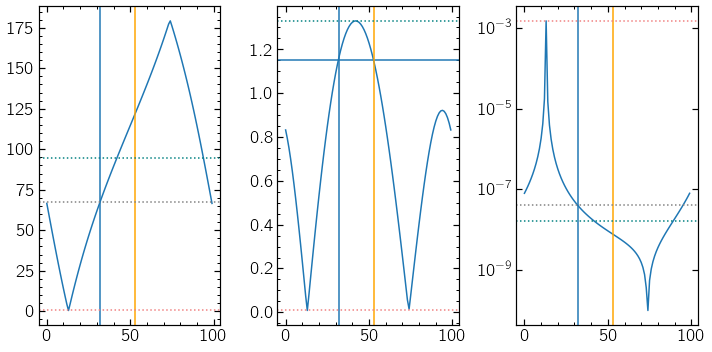

In [18]:

%matplotlib inline
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.plot(range(len(conts)),alphas)
plt.axvline(x = args[0],color='orange')
plt.axvline(x = args[1])
plt.axhline(y = phase_at_average_separation, ls=':', color='grey')
plt.axhline(y = phase_at_highest_contrast, ls=':', color='lightcoral')
plt.axhline(y = phase_at_largest_separation, ls=':', color='teal')
plt.subplot(132)
plt.plot(range(len(conts)),seps_lod)
plt.axhline(y = sep_mean_lod)
plt.axvline(x = args[0],color='orange')
plt.axvline(x = args[1])
plt.axhline(y = separation_at_highest_contrast, ls=':', color='lightcoral')
plt.axhline(y = separation_at_largest_separation, ls=':', color='teal')
plt.subplot(133)
plt.plot(range(len(conts)),conts)
plt.axvline(x = args[0],color='orange')
plt.axvline(x = args[1])
plt.axhline(y = contrast_at_average_separation, ls=':', color='grey')
plt.axhline(y = contrast_at_highest_contrast, ls=':', color='lightcoral')
plt.axhline(y = contrast_at_largest_separation, ls=':', color='teal')
plt.gca().set_yscale('log')
plt.tight_layout()

/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_48847/1970971557.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plotx = np.array([sep_mean_lod, separation_at_highest_contrast, separation_at_largest_separation])


NameError: name 'plo' is not defined

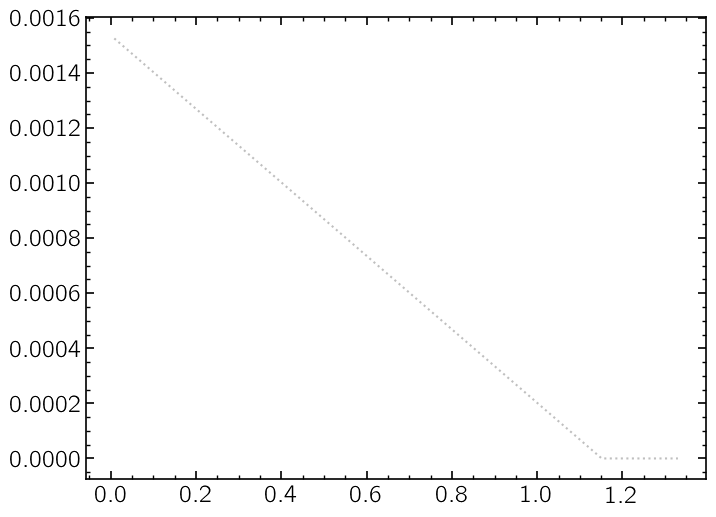

In [19]:
%matplotlib inline
plotx = np.array([sep_mean_lod, separation_at_highest_contrast, separation_at_largest_separation])
ploty = np.array([contrast_at_average_separation, contrast_at_highest_contrast, contrast_at_largest_separation])
args = np.argsort(plotx)
plt.plot(plotx[args],ploty[args], marker='None', ls=':', color='grey', alpha = 0.5)
plt.scatter(plo)
plt.gca().set_yscale('log')

# Put it together into a function

In [26]:
def GetOrbitalSepContAlpha(sma, ecc, inc, argp, lon, star_mass, pl_mass, distance, lod, n=100,
                          Ag = 0.3):
    meananom = np.linspace(0,2*np.pi,n)
    from myastrotools.reflectx_supplemental import (keplerian_to_cartesian, keplersconstant, danby_solve, 
                                                    eccentricity_anomaly, GetPhaseAngle, ComputeFluxRatio,
                                                   Get_LOD)

    kep = keplersconstant(star_mass*u.Msun,pl_mass*u.Mearth)
    seps = []
    conts = []
    alphas = []
    for j in range(len(meananom)):
        if np.isnan(argp):
            seps2 = []
            argps = []
            for w in np.linspace(0,2*np.pi, 50):
                pos, vel, acc = keplerian_to_cartesian(sma,ecc,inc,w,lon,meananom[j],kep)
                sep = np.sqrt(pos[0]**2+pos[1]**2)
                seps2.append(sep.value)
                argps.append(w)
            argp = np.mean(argps)
            
            sep = np.mean(seps2)*u.au
            alpha = GetPhaseAngle(meananom[j], ecc, inc, argp)
            
        else:
            pos, vel, acc = keplerian_to_cartesian(sma,ecc,inc,
                                                   argp,lon,meananom[j],kep)
            sep = np.sqrt(pos[0]**2+pos[1]**2)
            alpha = GetPhaseAngle(meananom[j], ecc, inc, argp)


        Rp = orbits.loc[i]['Re'] * u.Rearth
        cont = ComputeFluxRatio(Rp, sep, alpha, Ag = Ag)

        seps.append(sep.value)
        conts.append(cont.value)
        alphas.append(alpha)

    seps = np.array(seps)
    conts = np.array(conts)
    alphas = np.array(alphas)
    
    # Now what parts of the orbit will be inside the IWA?
    seps_mas = (seps/distance)*u.arcsec.to(u.mas)
    seps_lod = seps_mas/lod
    
    #ind = np.where(seps_lod > IWA)[0]
    
    #return seps_lod[ind], conts[ind], alphas[ind], [conts, alphas, seps_mas, seps_lod]
    return conts, alphas, seps, seps_mas, seps_lod

orbits['contrast_at_highest_contrast'] = np.nan
orbits['separation_at_highest_contrast'] = np.nan
orbits['phase_at_highest_contrast'] = np.nan
orbits['separation_at_largest_separation'] = np.nan
orbits['contrast_at_largest_separation'] = np.nan
orbits['phase_at_largest_separation'] = np.nan
orbits['separation_at_average_separation'] = np.nan
orbits['contrast_at_average_separation'] = np.nan
orbits['phase_at_average_separation'] = np.nan
orbits['avg sep in au'] = np.nan
orbits['avg sep in mas'] = np.nan
orbits['highest contrast sep in au'] = np.nan
orbits['highest contrast sep in mas'] = np.nan
orbits['highest sep in au'] = np.nan
orbits['highest sep in mas'] = np.nan

from myastrotools.tools import update_progress
import warnings
warnings.filterwarnings('ignore')

for i in range(len(orbits)):
    ### Inputs:
    ## Grab orbital parameters:
    inc = orbits.loc[i]['pl_orbincl'] # deg, keplerian_to_cartesian takes angles in degrees
    if np.isnan(inc):
        inc = 60
    ecc = orbits.loc[i]['pl_orbeccen']
    sma = orbits.loc[i]['pl_orbsmax']*u.au
    argp = orbits.loc[i]['pl_orblper'] # deg
    lon = 0
    star_mass = orbits.loc[i]['st_mass']
    pl_mass = orbits.loc[i]['pl_mass_or_msini_e']
    distance = orbits.loc[i]['sy_dist']

    # Filter:
    from myastrotools.reflectx_supplemental import (SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, 
                                                    NIRC2HFilter, NIRC2JFilter)
    filters = [SloangFilter(),SloanrFilter(),SloaniFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]
    from myastrotools.reflectx_supplemental import Get_LOD
    f = filters[2]
    lod_magaox = Get_LOD(f.central_wavelength*f.wavelength_unit, 6.5*u.m)
    lod_gmagaox = Get_LOD(f.central_wavelength*f.wavelength_unit, 25.4*u.m)

    conts, alphas, seps, seps_mas, seps_lod = GetOrbitalSepContAlpha(sma, ecc, inc, argp, lon, 
                                                                  star_mass, pl_mass, distance, lod_gmagaox,
                                                                  n=100)
    ### average orbital separation:
    sep_mean = sma * (1 + 0.5*ecc**2)
    sep_mean_mas = (sep_mean.value/distance)*u.arcsec.to(u.mas)
    sep_mean_lod = sep_mean_mas/lod_gmagaox
    average_separation = sep_mean_lod
    sep_mean = sma * (1 + 0.5*ecc**2)
    sep_mean_mas = (sep_mean.value/distance)*u.arcsec.to(u.mas)
    sep_mean_lod = sep_mean_mas/lod_gmagaox
    average_separation = sep_mean_lod
    # find where in array is closest to the mean sep:
    args = np.argsort(np.abs(seps_lod - sep_mean_lod))
    # if there is more than one crossing take the phase closest to full:
    phase_at_average_separation = np.min(alphas[args[:2]])
    # get that contrast too:
    ind = np.where(alphas[args[:2]] == np.min(alphas[args[:2]]))[0]
    contrast_at_average_separation = conts[args[ind]]
    orbits['avg sep in au'][i] = sep_mean
    orbits['avg sep in mas'][i] = sep_mean_mas
    orbits['separation_at_average_separation'][i] = average_separation
    orbits['contrast_at_average_separation'][i] = contrast_at_average_separation
    orbits['phase_at_average_separation'][i] = phase_at_average_separation
    
    ### at highest contrast:
    ind = np.where(conts == np.max(conts))[0]
    if len(ind) > 1:
        ind = ind[0]
    orbits['highest contrast sep in au'][i] = seps[ind]
    orbits['highest contrast sep in mas'][i] = seps_mas[ind]
    orbits['contrast_at_highest_contrast'][i] = conts[ind]
    orbits['separation_at_highest_contrast'][i] = seps_lod[ind]
    orbits['phase_at_highest_contrast'][i] = alphas[ind]
    
    ### at farthest separation:
    ind = np.where(seps_lod == np.max(seps_lod))[0]
    if len(ind) > 1:
        ind = ind[0]
    orbits['highest sep in au'][i] = seps[ind]
    orbits['highest sep in mas'][i] = seps_mas[ind]
    orbits['phase_at_largest_separation'][i] = alphas[ind]
    orbits['separation_at_largest_separation'][i] = seps_lod[ind]
    orbits['contrast_at_largest_separation'][i] = conts[ind]
    update_progress(i,len(orbits)-1)
    
    

100% (409 of 409): |####################|  Done...


In [27]:
orbits.to_csv('GMagAO-X-RV-targets-with-orbital-params.csv', index=False)
orbits

,pl_orbsmax,pl_orbper,pl_orbincl,pl_orbeccen,pl_masse,pl_msinie,st_mass,sy_dist,Re,pl_orblper,...,phase_at_largest_separation,separation_at_average_separation,contrast_at_average_separation,phase_at_average_separation,avg sep in au,avg sep in mas,highest contrast sep in au,highest contrast sep in mas,highest sep in au,highest sep in mas
0,2.8000,1796.4000,NaN,0.338,NaN,1506.45000,0.90,17.9323,11.981839,22.580,...,96.993692,26.322074,3.073426e-09,68.388675,2.959942,165.062017,1.084827,60.495703,3.659038,204.047307
1,1.6600,798.5000,NaN,0.680,NaN,565.73740,1.08,21.1397,11.686000,NaN,...,92.334659,15.417389,6.465884e-09,67.494069,2.043792,96.680275,0.404811,19.149312,2.786306,131.804431
2,0.9950,335.1000,NaN,0.289,NaN,3140.03000,1.16,44.6570,11.663215,307.000,...,75.666625,3.701471,2.996044e-08,55.050166,1.036552,23.211405,0.587270,13.150687,1.151372,25.782568
3,2.1000,1076.6000,NaN,0.012,NaN,778.68350,1.06,13.7967,11.843042,147.000,...,89.328610,24.274389,4.379872e-09,83.153894,2.100151,152.221270,1.043628,75.643330,2.120707,153.711166
4,3.6000,2391.0000,NaN,0.098,NaN,171.62100,1.06,13.7967,10.502257,295.000,...,83.451106,41.810055,1.578158e-09,69.595176,3.617287,262.184957,1.955822,141.760140,3.739426,271.037699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0.2300,39.6450,NaN,0.028,NaN,349.61300,1.00,17.4671,11.337947,30.000,...,90.598086,2.100633,3.743880e-07,78.574023,0.230090,13.172774,0.113416,6.493145,0.235558,13.485838
406,0.4157,102.5570,NaN,0.044,NaN,28.12781,0.91,17.4671,5.924378,16.000,...,90.853192,3.798852,3.238235e-08,76.351034,0.416102,23.822065,0.204946,11.733283,0.433262,24.804454
407,0.8290,240.9402,NaN,0.245,4443.24113,622.94368,1.31,13.4054,11.739158,247.659,...,74.999020,10.157579,4.034992e-08,61.493787,0.853880,63.696746,0.502500,37.484857,0.892441,66.573230
408,2.5170,1282.4100,NaN,0.294,NaN,1303.09647,1.29,13.4054,11.976042,73.800,...,109.116760,31.235717,1.679005e-09,101.666302,2.625780,195.874775,0.896646,66.886953,2.658294,198.300263


# Bokeh Plot

In [59]:
def MakeInteractiveSeparationContrastPlotOfNearbyRVPlanets(orbits, plotx, ploty, saveplot = True, Ag = 0.5,
                                                           filt = 'None', xaxis_label = '',
                                                           annotation_text = '', IWA = 2,
                                                           ytop = 2e-6, ybottom = 2e-10,
                                                          output_file_name = 'RVPlanetContrastPlot'):


    rad = orbits['Re'].copy()
    spt = orbits['SpT Number'].copy()
    
    plotx, ploty = np.array(plotx),np.array(ploty)
    multiplier = 2
    datadf = pd.DataFrame(data={'plotx':plotx, 'ploty':ploty, 'color':spt, 'markersize':rad*multiplier,
                               'name':orbits['pl_name'], 'rad':rad, 'spt':spt, 'dist':orbits['sy_dist']
                               })

    from bokeh.plotting import figure, show, output_file, save
    from bokeh.io import output_notebook
    from bokeh.models import LinearColorMapper, ColumnDataSource, LinearInterpolator
    from bokeh.models import  Range1d, LabelSet, Label, ColorBar, FixedTicker, Span
    from bokeh.palettes import Magma256, Turbo256
    from bokeh.transform import linear_cmap
    output_notebook()


    data=ColumnDataSource(data=datadf)


    mapper = linear_cmap(field_name='color', 
                         #palette=Magma256,
                         palette=Turbo256[::-1],
                         low=min(spt), high=max(spt),
                        low_color=Turbo256[::-1][150], high_color=Turbo256[::-1][200])
    tools = "hover, zoom_in, zoom_out, save, undo, redo, pan"
    tooltips = [
        ('Planet', '@name'),
        #("(x,y)", "($x, $y)"),
        ('Cont', '@ploty'),
        ('Sep [lod]', '@plotx{0.00}'),
        ('Rad [Rearth]','@rad{0.00}'),
        ('SpT','@spt{0.0}'),
        ('Dist [pc]','@dist{0.0}')
    ]

    p = figure(width=1000, height=850, y_axis_type="log", tools=tools, 
               tooltips=tooltips, toolbar_location="above")


    p.circle('plotx','ploty', source=data, fill_alpha=0.6, size='markersize', 
             line_color=mapper, color=mapper)


    color_bar = ColorBar(color_mapper=mapper['transform'], width=15, 
                         location=(0,0), title="Spectral Type",
                        title_text_font_size = '20pt',
                         major_label_text_font_size = '15pt')

    ticks = np.arange(4.0,7.0,0.5)
    color_bar.ticker=FixedTicker(ticks=ticks)
    color_bar.major_label_overrides = {6.5: 'G0V', 6:'G5V', 5.5:'K0V',5:'K5V',4.5:'M0V',4:'M5V'}
    p.add_layout(color_bar, 'right')

    label = Label(
        text= annotation_text,
        #text='yes',
        x=50, y=20,
        x_units="screen", y_units="screen",text_font_size = '20pt'
    )
    p.add_layout(label)
    
    delt = np.log10(ytop) - np.log10(ybottom)
    
    x,y = 16, 10**(np.log10(ybottom) + (0.9*delt))
    p.circle(x,y, fill_alpha=0.6, size=11*multiplier,
             color='black')
    label1 = Label(x=x, y=y, text=r'\[ 11 R$_\oplus$\]',
                       x_offset=20, y_offset=-20,
                       text_font_size = '20pt')
    p.add_layout(label1)
    
    x,y = 16, 10**(np.log10(ybottom) + (0.85*delt))
    p.circle(x,y, fill_alpha=0.6, size=5*multiplier, 
             color='black')
    label2 = Label(x=x, y=y, text=r'$$5 R_\oplus$$',
                      x_offset=20, y_offset=-20,text_font_size = '20pt')
    p.add_layout(label2)
    x,y = 16, 10**(np.log10(ybottom) + (0.8*delt))
    p.circle(x,y, fill_alpha=0.6, size=1*multiplier, 
             color='black')
    label3 = Label(x=x, y=y, text=r'$$1 R_\oplus$$',
                      x_offset=20, y_offset=-20,text_font_size = '20pt')
    p.add_layout(label3)

    p.xaxis.axis_label = xaxis_label
    p.yaxis.axis_label = r'\[ \mathrm{Planet/Star\; Reflected\; Light\; Flux\; Ratio} \]'
    p.xaxis.axis_label_text_font_size = '20pt'
    p.yaxis.axis_label_text_font_size = '20pt'
    p.yaxis.major_label_text_font_size = "15pt"
    p.xaxis.major_label_text_font_size = "15pt"
    
    iwa = Span(location=IWA,
                              dimension='height', line_color='grey',
                              line_dash='dashed', line_width=3)
    p.add_layout(iwa)
    
    p.x_range=Range1d(0,20)
    p.y_range=Range1d(ybottom,ytop)
    
    if saveplot:
        output_file(output_file_name+".html")
        save(p)
    else:
        show(p)

    return p


MakeInteractiveSeparationContrastPlotOfNearbyRVPlanets(orbits, orbits['separation_at_average_separation'],
                                                       orbits['contrast_at_average_separation'], Ag = 0.3,
                                                       filt = "i'",
                                                       xaxis_label = r'\[ \mathrm{Avg\; Projected\; Separation}\; [\lambda/D]\]',
                                                       annotation_text = r"$$\mathrm{For}\; A_g = 0.3, i'\; filter, \;D = 25.4m\$$",
                                                       saveplot = False)




Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

figure(id='p19078', ...)